In [2]:
%cd ..

c:\Users\jspre\year5project\HCI


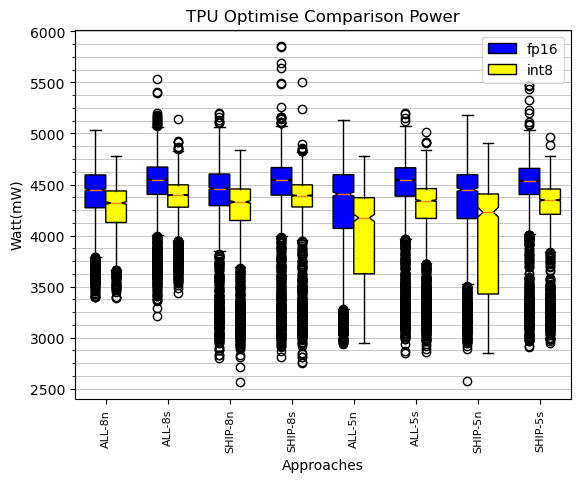

In [3]:
import os
import matplotlib.pyplot as plt
import re
from matplotlib.ticker import AutoMinorLocator
import numpy as np
from matplotlib.patches import Patch

folder_path = 'fullgpu'
all_values = []

for filename in os.listdir(folder_path):
    if filename.endswith('.txt') and "infer" in filename:
        with open(os.path.join(folder_path, filename), 'r') as file:
            data = [line.strip() for line in file if line.strip()]

        values = [float(line.split(',')[12]) for line in data if len(line.split(',')) == 15 and float(line.split(',')[12]) > 100]
        all_values.append(values)

xnames = []
for file in os.listdir(folder_path):
    if "infer" in file:
        tempsplit = re.split('[-_\.]', file)
        xnames.append(file)


index_a = 10
index_b = 12

all_values[index_a], all_values[index_a+1], all_values[index_b], all_values[index_b+1] = all_values[index_b], all_values[index_b+1], all_values[index_a], all_values[index_a+1]
xnames[index_a], xnames[index_a+1], xnames[index_b], xnames[index_b+1] = xnames[index_b], xnames[index_b+1], xnames[index_a], xnames[index_a+1]

fig, ax = plt.subplots()

pair_gap = 0.5
group_gap = 0.5
positions = []
for i in range(len(all_values)):
    if i % 2 == 0:
        positions.append(i * group_gap + i // 2 * pair_gap)
    else:
        positions.append(i * group_gap + (i - 1) // 2 * pair_gap)

bp = ax.boxplot(all_values, notch=True, patch_artist=True, positions=positions)

for box, file_name in zip(bp['boxes'], xnames):
    if "fp16" in file_name or "float16" in file_name:
        box.set_facecolor("blue")
    elif "int8" in file_name:
        box.set_facecolor("yellow")

new_positions = [pos + 0.5 * group_gap for pos in positions[::2]]
paired_xnames = [f'{xnames[i]} - {xnames[i+1]}' for i in range(0, len(xnames), 2)]

custom_labels = ['ALL-8n', 'ALL-8s', 'SHIP-8n', 'SHIP-8s','ALL-5n', 'ALL-5s', 'SHIP-5n', 'SHIP-5s']
paired_xnames = custom_labels

ax.set_xticks(new_positions)
ax.set_xticklabels(paired_xnames, rotation=90)
ax.tick_params(axis='x', labelsize=8)

ax.set_ylabel('Virtual Memory Consumption MB (Raspberry Pi 3B+)')
ax.grid(axis='y', alpha=1.0, linestyle='-')

ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.grid(True, which='major', linestyle='-', linewidth=0.5)
ax.yaxis.grid(True, which='minor', linestyle='-', alpha=1.0, linewidth=0.5)
ax.set_xlabel('Approaches')
ax.set_ylabel('Watt(mW)')
ax.set_title('TPU Optimise Comparison Power')

legend_elements = [
    Patch(facecolor="blue", edgecolor='k', label="fp16"),
    Patch(facecolor="yellow", edgecolor='k', label="int8")
]
ax.legend(handles=legend_elements, loc='best')

plt.show()


In [6]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 906C-8A93

 Directory of c:\Users\jspre\year5project\HCI

10/04/2023  23:09    <DIR>          .
10/04/2023  23:09    <DIR>          ..
09/04/2023  16:54            65,433 1231231231.png
09/04/2023  19:06           152,846 33.png
09/04/2023  18:35            88,095 44.png
09/04/2023  18:55           159,245 55.png
01/04/2023  17:24            67,119 a.png
09/04/2023  15:39    <DIR>          backup
06/04/2023  15:56    <DIR>          comparisons-to-tpu-on-cpu-pi3b
09/04/2023  22:53    <DIR>          cputhenGPU
04/04/2023  14:04    <DIR>          edgetpupowerdata
03/04/2023  12:49    <DIR>          full
09/04/2023  15:53    <DIR>          fullgpu
09/04/2023  14:42         2,333,845 graph.ipynb
11/04/2023  00:05         2,124,302 heatmap.ipynb
09/04/2023  15:53    <DIR>          inferdatagpu
10/04/2023  12:22           116,954 logtime-20230410T112131Z-001.zip
08/04/2023  15:29    <DIR>          maxtpu
10/04/2023  23:57    <DIR>     

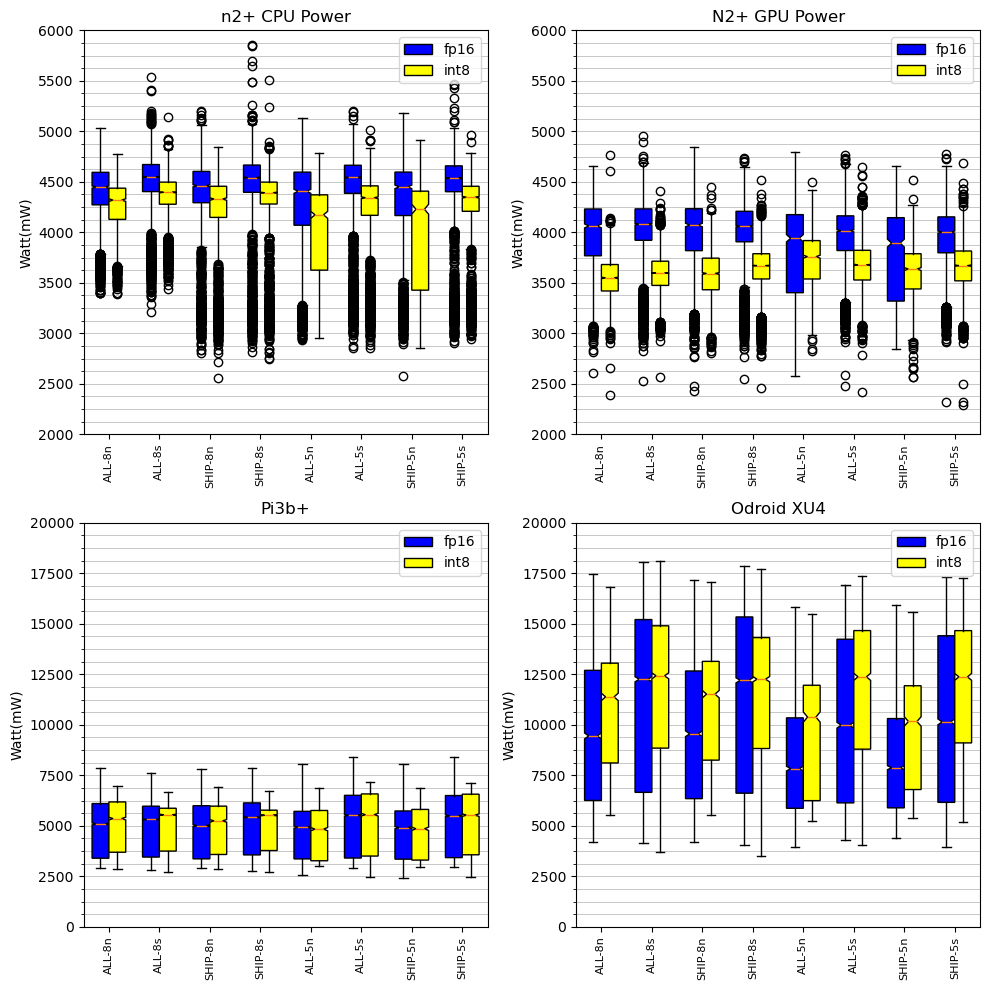

In [20]:
import os
import matplotlib.pyplot as plt
import re
from matplotlib.ticker import AutoMinorLocator
import numpy as np
from matplotlib.patches import Patch

def create_plot(ax, folder_path, index,custom_labels=None, title=None,top=None):
    all_values = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.txt') and "infer" in filename:
            with open(os.path.join(folder_path, filename), 'r') as file:
                data = [line.strip() for line in file if line.strip()]

            values = [float(line.split(',')[index]) for line in data if len(line.split(',')) == 15 and float(line.split(',')[index]) > 100]
            all_values.append(values)

    xnames = []
    for file in os.listdir(folder_path):
        if "infer" in file:
            tempsplit = re.split('[-_\.]', file)
            xnames.append(file)

    index_a = 10
    index_b = 12

    all_values[index_a], all_values[index_a+1], all_values[index_b], all_values[index_b+1] = all_values[index_b], all_values[index_b+1], all_values[index_a], all_values[index_a+1]
    xnames[index_a], xnames[index_a+1], xnames[index_b], xnames[index_b+1] = xnames[index_b], xnames[index_b+1], xnames[index_a], xnames[index_a+1]

    pair_gap = 0.5
    group_gap = 0.5
    positions = []
    for i in range(len(all_values)):
        if i % 2 == 0:
            positions.append(i * group_gap + i // 2 * pair_gap)
        else:
            positions.append(i * group_gap + (i - 1) // 2 * pair_gap)

    bp = ax.boxplot(all_values, notch=True, patch_artist=True, positions=positions)

    for box, file_name in zip(bp['boxes'], xnames):
        if "fp16" in file_name or "float16" in file_name:
            box.set_facecolor("blue")
        elif "int8" in file_name:
            box.set_facecolor("yellow")

    new_positions = [pos + 0.5 * group_gap for pos in positions[::2]]
    paired_xnames = [f'{xnames[i]} - {xnames[i+1]}' for i in range(0, len(xnames), 2)]

    if custom_labels is not None:
        paired_xnames = custom_labels

    ax.set_xticks(new_positions)
    ax.set_xticklabels(paired_xnames, rotation=90)
    ax.tick_params(axis='x', labelsize=8)

    ax.set_ylabel('Virtual Memory Consumption MB (Raspberry Pi 3B+)')
    ax.grid(axis='y', alpha=1.0, linestyle='-')

    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.grid(True, which='major', linestyle='-', linewidth=0.5)
    ax.yaxis.grid(True, which='minor', linestyle='-', alpha=1.0, linewidth=0.5)
    ax.set_ylabel('Watt(mW)')

    ax.set_ylim(2000, 6000)


    if top is not None:
        ax.set_ylim(0, top)

    if title is not None:
        ax.set_title(title)

    legend_elements = [
        Patch(facecolor="blue", edgecolor='k', label="fp16"),
        Patch(facecolor="yellow", edgecolor='k', label="int8")
    ]
    ax.legend(handles=legend_elements, loc='best')

custom_labels = ['ALL-8n', 'ALL-8s', 'SHIP-8n', 'SHIP-8s', 'ALL-5n', 'ALL-5s', 'SHIP-5n', 'SHIP-5s']
pi_custom_labels = ['ALL-8n', 'ALL-8s', 'SHIP-8n', 'SHIP-8s', 'ALL-5n', 'ALL-5s', 'SHIP-5n', 'SHIP-5s','ALL-5n-TPU-SHIP-5n-TPU','ALL-5s-TPU-SHIP-5s-TPU']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

create_plot(axes[0, 0], 'n2+cpupower', 12, custom_labels, "n2+ CPU Power")
create_plot(axes[0, 1], 'fullgpu', 12,custom_labels, "N2+ GPU Power")
create_plot(axes[1, 0], 'pi3b+cpupower', 7, custom_labels,"Pi3b+",20000)
create_plot(axes[1, 1], 'odroidxu4power', 12,custom_labels,"Odroid XU4",20000)
#create_plot(axes[1, 1], 'cputhenGPU', 12,custom_labels,"cputhenGPU")
# The fourth plot can be created by calling the create_plot function with appropriate parameters

plt.tight_layout()
plt.show()
fig.savefig("power", dpi=300, bbox_inches='tight')

In [4]:
%cd ..

c:\Users\jspre\year5project\HCI


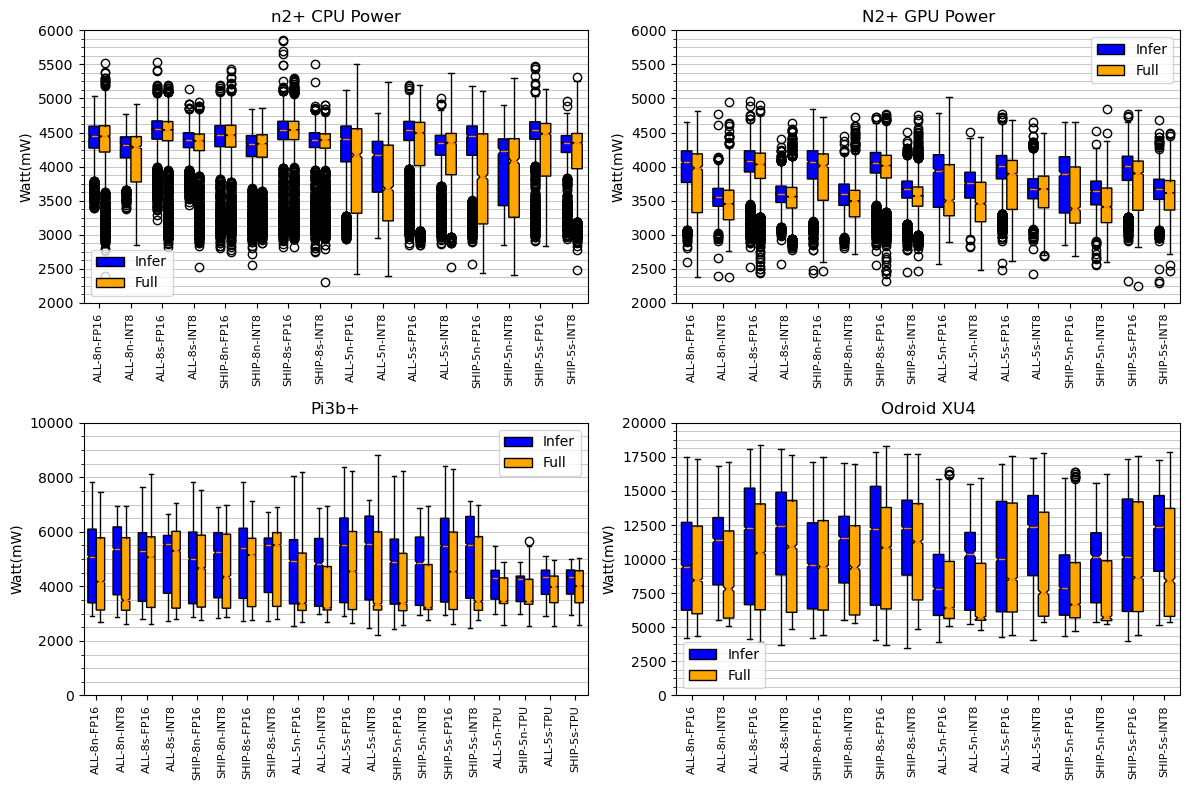

In [65]:
import os
import matplotlib.pyplot as plt
import re
from matplotlib.ticker import AutoMinorLocator
import numpy as np
from matplotlib.patches import Patch



def create_plot(ax, folder_path, index, custom_labels=None, title=None, top=None):
    all_values = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            with open(os.path.join(folder_path, filename), 'r') as file:
                data = [line.strip() for line in file if line.strip()]
            values = [float(line.split(',')[index]) for line in data if len(line.split(',')) == 15 and float(line.split(',')[index]) > 100]
            all_values.append(values)

    xnames = []
    for file in os.listdir(folder_path):
        tempsplit = re.split('[-_\.]', file)
        xnames.append(file)




    index_a = 20
    index_b = 24

    all_values[index_a], all_values[index_a+1], all_values[index_b], all_values[index_b+1] = all_values[index_b], all_values[index_b+1], all_values[index_a], all_values[index_a+1]
    xnames[index_a], xnames[index_a+1], xnames[index_b], xnames[index_b+1] = xnames[index_b], xnames[index_b+1], xnames[index_a], xnames[index_a+1]

    index_a = 22
    index_b = 26

    all_values[index_a], all_values[index_a+1], all_values[index_b], all_values[index_b+1] = all_values[index_b], all_values[index_b+1], all_values[index_a], all_values[index_a+1]
    xnames[index_a], xnames[index_a+1], xnames[index_b], xnames[index_b+1] = xnames[index_b], xnames[index_b+1], xnames[index_a], xnames[index_a+1]

    pair_gap = 0.5
    group_gap = 0.5
    positions = []
    for i in range(len(all_values)):
        if i % 2 == 0:
            positions.append(i * group_gap + i // 2 * pair_gap)
        else:
            positions.append(i * group_gap + (i - 1) // 2 * pair_gap)

    bp = ax.boxplot(all_values, notch=True, patch_artist=True, positions=positions)

    for box, file_name in zip(bp['boxes'], xnames):
        if "infer" in file_name:
            box.set_facecolor("blue")
        else:
            box.set_facecolor("orange")

    new_positions = [pos + 0.5 * group_gap for pos in positions[::2]]
    paired_xnames = [f'{xnames[i]} - {xnames[i+1]}' for i in range(0, len(xnames), 2)]

    if custom_labels is not None:
        paired_xnames = custom_labels

    ax.set_xticks(new_positions)
    ax.set_xticklabels(paired_xnames, rotation=90)
    ax.tick_params(axis='x', labelsize=8)

    ax.grid(axis='y', alpha=1.0, linestyle='-')
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.grid(True, which='major', linestyle='-', linewidth=0.5)
    ax.yaxis.grid(True, which='minor', linestyle='-', alpha=1.0, linewidth=0.5)
    ax.set_ylabel('Watt(mW)')
    ax.set_ylim(2000, 6000)


    if top is not None:
        ax.set_ylim(0, top)


    if title is not None:
        ax.set_title(title)

    legend_elements = [Patch(facecolor="blue", edgecolor='k', label="Infer"),
                       Patch(facecolor="orange", edgecolor='k', label="Full")]
    ax.legend(handles=legend_elements, loc='best')


# Example usage:


custom_labels = ['ALL-8n-FP16', 'ALL-8n-INT8', 'ALL-8s-FP16', 'ALL-8s-INT8', 'SHIP-8n-FP16', 'SHIP-8n-INT8', 'SHIP-8s-FP16', 'SHIP-8s-INT8', 'ALL-5n-FP16', 'ALL-5n-INT8', 'ALL-5s-FP16', 'ALL-5s-INT8', 'SHIP-5n-FP16', 'SHIP-5n-INT8', 'SHIP-5s-FP16', 'SHIP-5s-INT8']
picustom_labels = ['ALL-8n-FP16', 'ALL-8n-INT8', 'ALL-8s-FP16', 'ALL-8s-INT8', 'SHIP-8n-FP16', 'SHIP-8n-INT8', 'SHIP-8s-FP16', 'SHIP-8s-INT8', 'ALL-5n-FP16', 'ALL-5n-INT8', 'ALL-5s-FP16', 'ALL-5s-INT8', 'SHIP-5n-FP16', 'SHIP-5n-INT8', 'SHIP-5s-FP16', 'SHIP-5s-INT8','ALL-5n-TPU','SHIP-5n-TPU','ALL-5s-TPU','SHIP-5s-TPU']
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

create_plot(axs[0, 0], 'n2+cpupower', 12, custom_labels=custom_labels, title="n2+ CPU Power")
create_plot(axs[0, 1], 'fullgpu', 12, custom_labels=custom_labels, title="N2+ GPU Power")
create_plot(axs[1, 0], 'pi3b+cpupower', 7,custom_labels=picustom_labels, title="Pi3b+",top=10000)
create_plot(axs[1, 1], 'odroidxu4power', 12, custom_labels=custom_labels, title="Odroid XU4",top=20000)

plt.tight_layout()
plt.savefig("powerbothgrid.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()




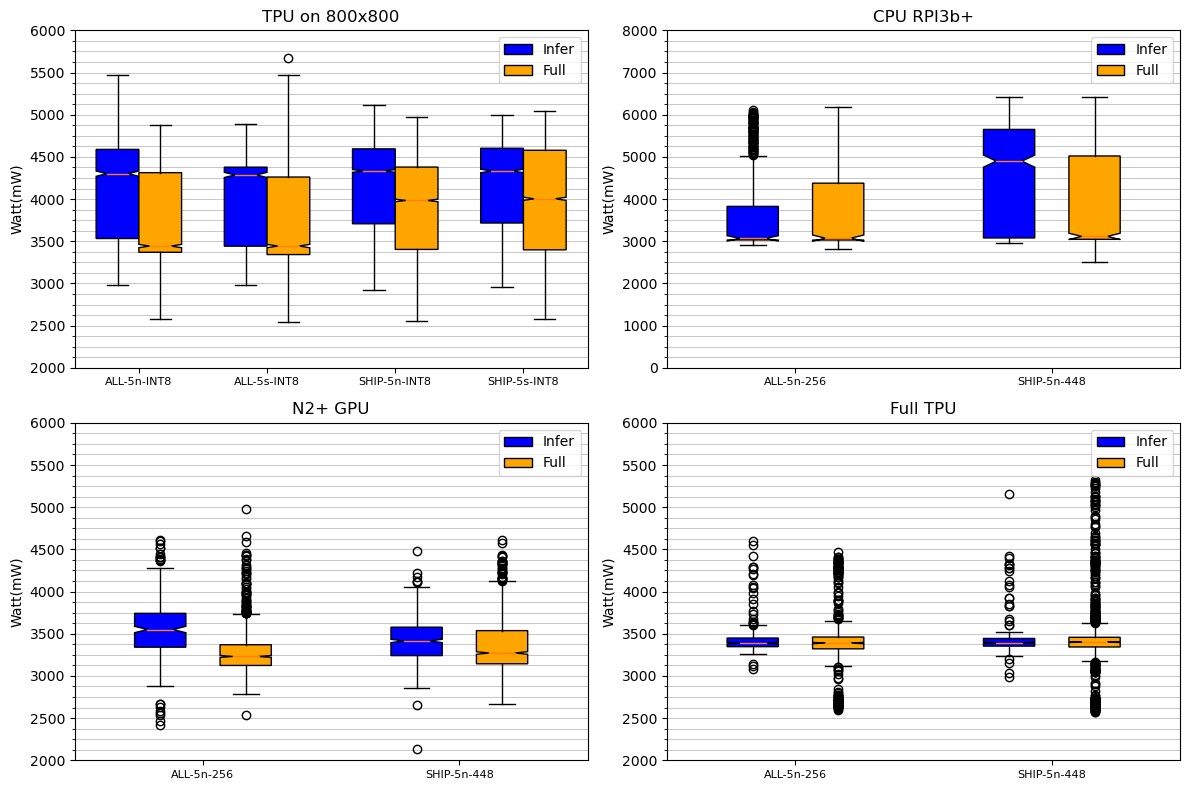

In [66]:
import os
import matplotlib.pyplot as plt
import re
from matplotlib.ticker import AutoMinorLocator
import numpy as np
from matplotlib.patches import Patch



def create_plot(ax, folder_path, index, custom_labels=None, title=None, top=None):
    all_values = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            with open(os.path.join(folder_path, filename), 'r') as file:
                data = [line.strip() for line in file if line.strip()]
            values = [float(line.split(',')[index]) for line in data if len(line.split(',')) == 15 and float(line.split(',')[index]) > 100]
            all_values.append(values)

    xnames = []
    for file in os.listdir(folder_path):
        tempsplit = re.split('[-_\.]', file)
        xnames.append(file)





    pair_gap = 0.5
    group_gap = 0.5
    positions = []
    for i in range(len(all_values)):
        if i % 2 == 0:
            positions.append(i * group_gap + i // 2 * pair_gap)
        else:
            positions.append(i * group_gap + (i - 1) // 2 * pair_gap)

    bp = ax.boxplot(all_values, notch=True, patch_artist=True, positions=positions)

    for box, file_name in zip(bp['boxes'], xnames):
        if "infer" in file_name:
            box.set_facecolor("blue")
        else:
            box.set_facecolor("orange")

    new_positions = [pos + 0.5 * group_gap for pos in positions[::2]]
    paired_xnames = [f'{xnames[i]} - {xnames[i+1]}' for i in range(0, len(xnames), 2)]

    if custom_labels is not None:
        paired_xnames = custom_labels

    ax.set_xticks(new_positions)
    ax.set_xticklabels(paired_xnames)
    ax.tick_params(axis='x', labelsize=8)

    ax.grid(axis='y', alpha=1.0, linestyle='-')
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.grid(True, which='major', linestyle='-', linewidth=0.5)
    ax.yaxis.grid(True, which='minor', linestyle='-', alpha=1.0, linewidth=0.5)
    ax.set_ylabel('Watt(mW)')
    ax.set_ylim(2000, 6000)


    if top is not None:
        ax.set_ylim(0, top)


    if title is not None:
        ax.set_title(title)

    legend_elements = [Patch(facecolor="blue", edgecolor='k', label="Infer"),
                       Patch(facecolor="orange", edgecolor='k', label="Full")]
    ax.legend(handles=legend_elements, loc='best')


# Example usage:


custom_labels = ['ALL-5n-INT8', 'ALL-5s-INT8', 'SHIP-5n-INT8', 'SHIP-5s-INT8']
custom_labelstpucomparison = ['ALL-5n-256', 'SHIP-5n-448']
picustom_labels = ['ALL-8n-FP16', 'ALL-8n-INT8', 'ALL-8s-FP16', 'ALL-8s-INT8', 'SHIP-8n-FP16', 'SHIP-8n-INT8', 'SHIP-8s-FP16', 'SHIP-8s-INT8', 'ALL-5n-FP16', 'ALL-5n-INT8', 'ALL-5s-FP16', 'ALL-5s-INT8', 'SHIP-5n-FP16', 'SHIP-5n-INT8', 'SHIP-5s-FP16', 'SHIP-5s-INT8','ALL-5n-TPU','SHIP-5n-TPU','ALL-5s-TPU','SHIP-5s-TPU']
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

create_plot(axs[0, 0], 'tpu800power', 7, custom_labels=custom_labels, title="TPU on 800x800")
create_plot(axs[0, 1], 'tpucomparisonpower', 7, custom_labels=custom_labelstpucomparison, title="CPU RPI3b+" , top=8000)
create_plot(axs[1, 0], 'tpugpucomparison', 12,custom_labels=custom_labelstpucomparison, title="N2+ GPU")
create_plot(axs[1, 1], 'tpustandard', 7, custom_labels=custom_labelstpucomparison, title="Full TPU",)

plt.tight_layout()
plt.savefig("fulltpucomparegridpower.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()




ValueError: The number of FixedLocator locations (12), usually from a call to set_ticks, does not match the number of ticklabels (6).

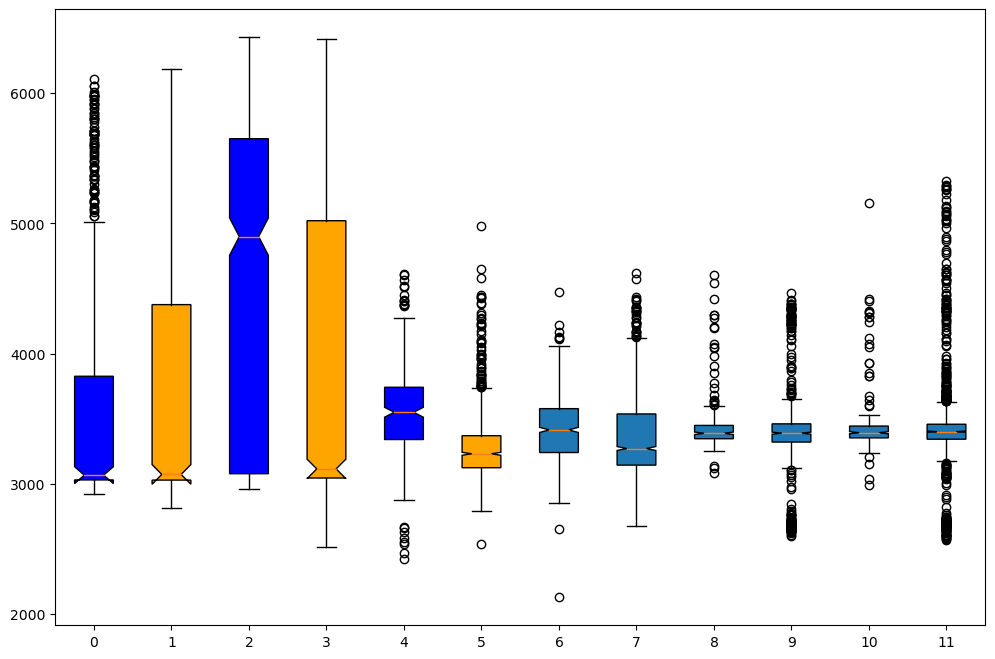

In [53]:
import os
import matplotlib.pyplot as plt
import re
from matplotlib.ticker import AutoMinorLocator
import numpy as np
from matplotlib.patches import Patch

def append_data(folder_path, index, custom_labels=None, colors=None):
    all_values = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            with open(os.path.join(folder_path, filename), 'r') as file:
                data = [line.strip() for line in file if line.strip()]
            values = [float(line.split(',')[index]) for line in data if len(line.split(',')) == 15 and float(line.split(',')[index]) > 100]
            all_values.append(values)

    xnames = [re.split('[-_\.]', file)[0] for file in os.listdir(folder_path) if file.endswith('.txt')]

    legend_elements = [Patch(facecolor=color, edgecolor='k', label=label) for color, label in zip(colors, custom_labels)]

    return all_values, custom_labels, colors, legend_elements

fig, ax = plt.subplots(figsize=(12, 8))



values1, labels1, colors1, legend1 = append_data('tpucomparisonpower', 7, custom_labels=['ALL-5n-INT8', 'SHIP-5n-INT8'], colors=["blue", "orange"])
values2, labels2, colors2, legend2 = append_data('tpugpucomparison', 12, custom_labels=['ALL-5n-INT8', 'SHIP-5n-INT8'], colors=["blue", "orange"])
values3, labels3, colors3, legend3 = append_data('tpustandard', 7, custom_labels=['ALL-5n-INT8', 'SHIP-5n-INT8'], colors=["blue", "orange"])


all_values = values1 + values2 + values3 
all_labels = labels1 + labels2 +labels2
all_colors = colors1 + colors2 +colors3

positions = list(range(len(all_values)))
bp = plt.boxplot(all_values, notch=True, patch_artist=True, positions=positions)

for box, color in zip(bp['boxes'], all_colors):
    box.set_facecolor(color)

plt.xticks(positions, all_labels, rotation=90)

ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.grid(True, which='major', linestyle='-', linewidth=0.5)
ax.yaxis.grid(True, which='minor', linestyle='-', alpha=1.0, linewidth=0.5)
ax.set_ylabel('Watt(mW)')
ax.set_ylim(2000, 6000)

legend_elements = legend1 + legend2 +legend3
ax.legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()
